# German traffic sign classification
Fully connected neural network

# Import libraries and datasets

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import pandas as pd
import seaborn as sns
import pickle
import random
import os

# Open dataset

In [2]:
with open(os.path.join("..","dataset","train.p"), mode='rb') as training_data:
    train = pickle.load(training_data)
with open(os.path.join("..","dataset","valid.p"), mode='rb') as validation_data:
    valid = pickle.load(validation_data)

X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']

In [3]:
from sklearn.utils import shuffle
X_train, y_train = shuffle(X_train, y_train)
X_valid, y_valid = shuffle(X_valid, y_valid)

In [4]:
# Normalize image to [0, 1]
X_train_norm = X_train / 255
X_valid_norm = X_valid / 255

Error in callback <function _draw_all_if_interactive at 0x0000019337681E40> (for post_execute), with arguments args (),kwargs {}:


ValueError: arrays must be of dtype byte, short, float32 or float64

ValueError: arrays must be of dtype byte, short, float32 or float64

<Figure size 640x480 with 1 Axes>

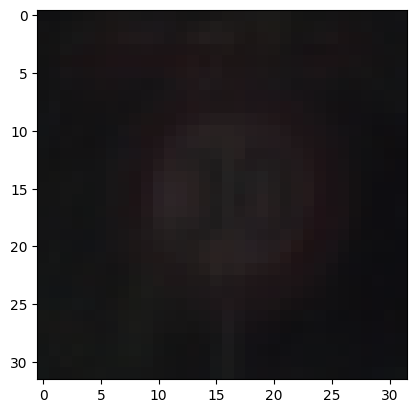

In [5]:
# Check that the images have been correctly converted and normalised
i = random.randint(1, len(X_train_norm))
plt.grid(False)
plt.imshow(X_train[i])
plt.figure()
plt.grid(False)
plt.imshow(X_train_norm[i].squeeze(), cmap = 'gray') # cmap

# Create the Convolutional Neural Network with keras


In [6]:
from tensorflow.keras import datasets, layers, models
model = models.Sequential()
model.add(layers.Flatten(input_shape=(32,32,3)))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.25))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(43, activation='sigmoid'))
model.summary()

C:\Users\Dima\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 3072)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       786,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 43)             │         2,795 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 830,635 (3.17 MB)

 Trainable params: 830,635 (3.17 MB)

 Non-trainable params: 0 (0.00 B)

# Compile your model
When you want, you can change the [optimizer](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers) or the [loss function](https://www.tensorflow.org/api_docs/python/tf/keras/losses).

In [7]:
model.compile(optimizer = 'Adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

# Train your model
The documentation of the fit method: [https://www.tensorflow.org/api_docs/python/tf/keras/Model#fit](https://www.tensorflow.org/api_docs/python/tf/keras/Model#fit)

In [8]:
history = model.fit(x = X_train_norm,
                    y = y_train,
                    batch_size = 32,
                    epochs = 10,
                    verbose = 1,
                    validation_data = (X_valid_norm, y_valid))

Epoch 1/10
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.1390 - loss: 3.2455 - val_accuracy: 0.4596 - val_loss: 1.7157
Epoch 2/10
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.4744 - loss: 1.6653 - val_accuracy: 0.6308 - val_loss: 1.1422
Epoch 3/10
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.6238 - loss: 1.1814 - val_accuracy: 0.7118 - val_loss: 0.9430
Epoch 4/10
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.6952 - loss: 0.9523 - val_accuracy: 0.7161 - val_loss: 0.8057
Epoch 5/10
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.7437 - loss: 0.8198 - val_accuracy: 0.7796 - val_loss: 0.7424
Epoch 6/10
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.7726 - loss: 0.7320 - val_accuracy: 0.8177 - val_loss: 0.6647
Epoch 7/10
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.7864 - loss: 0.6973 - val_accuracy: 0.8422 - val_loss: 0.5377
Epoch 8/10
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.7933 - loss: 0.6796 - 

# Save your model
Create a folder for your models

In [9]:
model.save('saved_model/my_fcnn_model.h5')

# Analyse the results

In [10]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [11]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

Text(0.5, 1.0, 'Training and Validation loss')

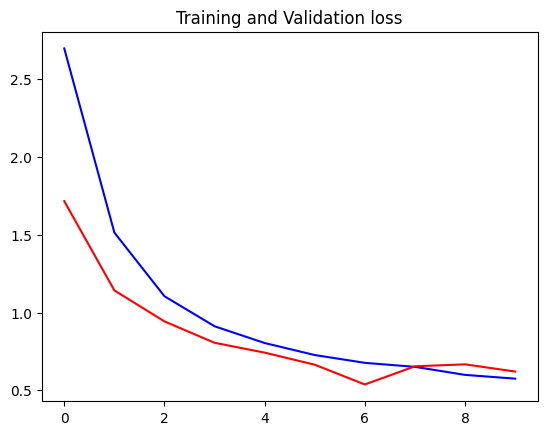

In [12]:
epochs = range(len(accuracy))
plt.plot(epochs, loss, 'b', label = 'Training loss')
plt.plot(epochs, val_loss, 'r', label = 'Validation loss')
plt.title('Training and Validation loss')

Text(0.5, 1.0, 'Training and Validation accuracy')

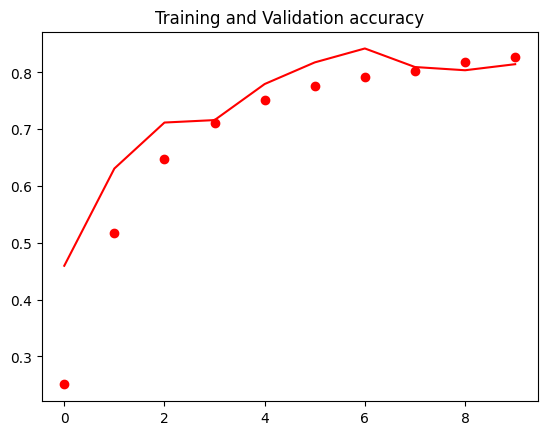

In [13]:
plt.plot(epochs, accuracy, 'ro', label = 'Training accuracy')
plt.plot(epochs, val_accuracy, 'r', label = 'Validation accuracy')
plt.title('Training and Validation accuracy')

# Load your model

In [14]:
model = tf.keras.models.load_model('saved_model/my_fcnn_model.h5')

FileNotFoundError: [Errno 2] Unable to synchronously open file (unable to open file: name = 'saved_model/my_model.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

# Test your model with the test dataset
If you don't have the test dataset use the validation dataset.

In [ ]:
score = model.evaluate(X_valid_norm, y_valid)
print('Test Accuracy: {}'.format(score[1]))

In [ ]:
from sklearn.metrics import confusion_matrix
predicted_classes = np.argmax(model.predict(X_valid_norm), axis=-1)
y_true = y_valid

cm = confusion_matrix(y_true, predicted_classes)

In [ ]:
plt.figure(figsize = (25, 25))
sns.heatmap(cm, annot = True)